<a href="https://colab.research.google.com/github/JustinRSK/2024_Intro_Python/blob/main/Copie_de_w4_s1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercises) Multivariate linear regression and clustering

What if our dataset has multiple dimensions and we want to find equations that looks something like this?
$$
y = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b
$$

Here we show how we would do it with scikit-learn to find a linear equation that describes the Kaggle [Advertising dataset](https://www.kaggle.com/datasets/bumba5341/advertisingcsv?resource=download)

## Exercise 1: Multivariate linear regression

### Q1: Use pandas to import the advertising dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pooch
import urllib.request
import pandas as pd

In [ ]:
myadvertising = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/EeqnI6nF9iBAkUOACbZ3mWUBDZ8N5mVP1oOaFd4vy6tIzw?download=1',
                          known_hash='69104adc017e75d7019f61fe66ca2eb4ab014ee6f2a9b39b452943f209352010')

In [ ]:
# Q1a: Use pandas to import the dataset

In [ ]:
# Q1b: Display the first rows of the data with pandas

In [ ]:
#@title Code skeleton
# Q1a: Use pandas to import the dataset
df = pd.read_csv(myadvertising)
# Q1b: Display the first rows of the data with pandas
print(df.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


### Q2: Try to use scikit-learn linear regression model to predict "Sales" from three columns "TV", "Radio", "Newspaper"

This model will basically tell us how sales would change if we put resources to advertise products in three different medias. The [Linear Regression documentation is at this link](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html).

In [ ]:
# Import the linear regression model you wish to use


In [ ]:
# Construct Input / Output matrices
# and instantiate / train a linear regression model


In [ ]:
#@title Code skeleton
from sklearn.linear_model import LinearRegression

# Construct Input / Output matrices
Xall = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values
linreg = LinearRegression()
linreg.fit(Xall, y)

LinearRegression()

### Q3: Print out the linear equation coefficients and intercept

Hints:

(1) When you print the coefficients and intercepts, try to retain only the first two digits. One way to do it is through the `.round()` function in `numpy`

(2) Check out the scikit-learn `linear-model` module for instructions on extracting the coefficients and intercepts of the trained model.


In [ ]:
# Print your coefficients and intercept here.
coefficients = np.round(linreg.coef_, 2)
intercept = np.round(linreg.intercept_, 2)

print(f'Coefficients {coefficients}, Intercept {intercept}' )

Coefficients [ 0.05  0.19 -0.  ], Intercept 2.94


## Exercise 2: Clustering Penguin Dataset

In the exercise, we will try to repeat the k-mean clustering procedure introuduced in the tutorial, but on a different 2D variable plane.

Let's try "culmen_length_mm" and "Flipper_length_mm"?

Can we differentiate penguins from the length of the beak and their wings?

<img style="padding: 10px; float:left;" alt="20 points and their Voronoi cells by Balu Ertl CC BY-SA 4.0" src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width="400">

In [ ]:
penguinsize = pooch.retrieve('https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/ETfy8shC_PtBnsYren_f60UBSyn6Zz1CVvE0Z6_z575VZA?download=1',
                          known_hash='aa728597b2228a2637e39c6f08e40a80971f4cdac7faf7bc21ff4481ee3e3ae9')

penguins = pd.read_csv(penguinsize)
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


### Q1: Data clean up. Remove all rows in the table if the rows contain missing values

Hint: `pandas` has a easy function for data clean up. Check out [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) for details.

In [ ]:
# Clean up the data here


In [ ]:
#@title Code skeleton
penguin_df = penguins.dropna()
print(penguin_df.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE  


### Q2: Create an input dataset `X` with the culmen_length_mm and flipper_length_mm data columns

Hints:

(1) The shape of your input data should be `(334, 2)`

In [ ]:
# Create your input for model training here
# Input should contain penguin_df['culmen_length_mm'] and penguin_df['flipper_length_mm']
X = penguin_df[['culmen_length_mm', 'flipper_length_mm']]
print(X.shape)

(334, 2)


### Q3: Train a K-means clustering algorithm, and perform an elbow test followed by silhouette analysis

Hints:

(1) The documentation for KMeans clustering can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans)

(2) [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html?highlight=silhouette+score#sklearn.metrics.silhouette_score) for silhouette score analysis in scikit-learn

In [ ]:
# Import the KMeans class and
# the Silhouette score function from scikit-learn


In [ ]:
#@title Skeleton code
# Import KMeans fron scikit-learn
from sklearn.cluster import KMeans
# Import Silhouette score fron scikit-learn
from sklearn.metrics import silhouette_score

In [ ]:
# Store the K-means inertia in an empty list


In [ ]:
#@title Skeleton code
# Store the K-means inertia in an empty list
Sum_of_squared_distances = []
K = range(1, 10)
X = penguin_df[['culmen_length_mm', 'flipper_length_mm']]
for num_clusters in K:
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  Sum_of_squared_distances.append(kmeans.inertia_)


In [ ]:
# To finish the elbow method analysis,
# plot the change in inertia when you change the number of clusters
# you used to train the k-means clustering algorithm.



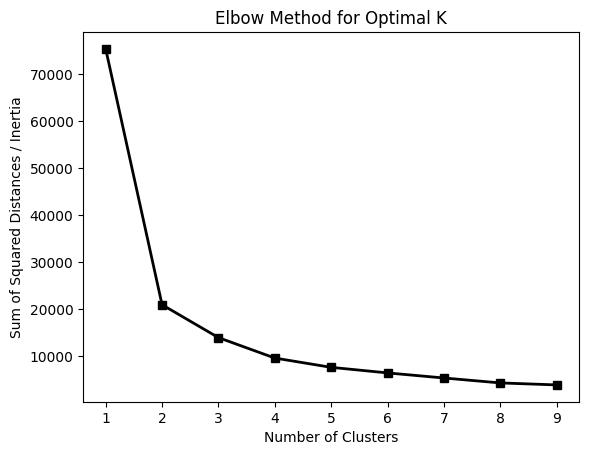

In [ ]:
#@title Skeleton code
# To finish the elbow method analysis, plot the change in inertia when you change the number of clusters you used to train the k-means clustering algorithm.
plt.plot(K,Sum_of_squared_distances,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

This is what your TA got after filling in and running the skeleton code.

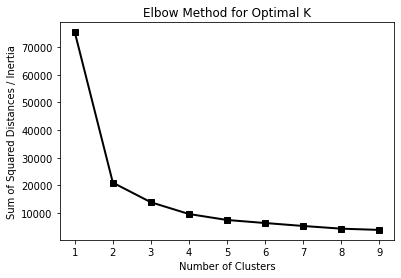

In [ ]:
# Perform silhouette analysis following instructions in the tutorial notebook


In [ ]:
#@title Skeleton code
silhouette_scores = []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans =  KMeans(n_clusters=num_clusters)
  kmeans.fit(X)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_scores.append(silhouette_score(X, cluster_labels))

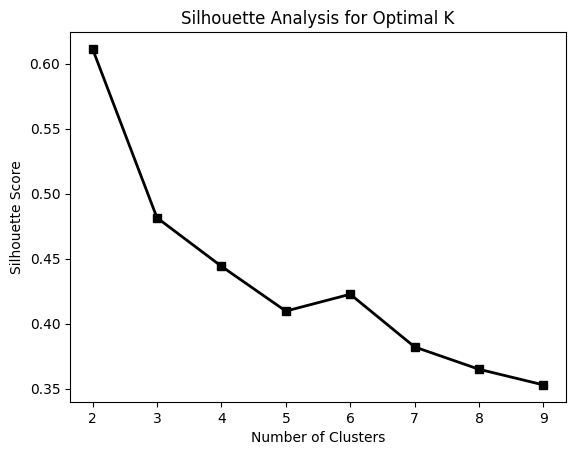

In [ ]:
# Plot your silhouette analysis result here.
K = range(2, 10)
plt.plot(K, silhouette_scores,marker='s',c='k',lw=2)
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Here is a screenshot of how the results should look like.

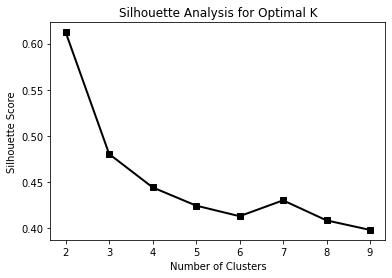

Based on the silhouette and elbow analysis, it seems the either 2 or 3 clusters is suitable for this penguin dataset.

### Q4: Perform KMeans clustering with 3 clusters

In [ ]:
# Train a k-means clustering model with 3 clusters


In [ ]:
# Use the model to label all data points


In [ ]:
#@title Skeleton code
# Train a k-means clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Use the model to label all data points
labels = kmeans.labels_

Now, our penguin dataset is labelled. So we can compare our clustering results with the truth to see how well our trained model performed.

First store the predicted labels in the pandas dataframe

In [ ]:
# Store the predicted labels in a new index

In [ ]:
#@title Skeleton code
penguin_df['Cluster'] = labels

<ipython-input-16-936b8678722c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df['Cluster'] = labels


Then extract the culmen_length_mm and flipper_length_mm of the three penguin categories as truth

In [ ]:
# Adelie
adelie = penguin_df[penguin_df['species'] == 'Adelie'][['culmen_length_mm', 'flipper_length_mm']]

# Gentoo
gentoo = penguin_df[penguin_df['species'] == 'Gentoo'][['culmen_length_mm', 'flipper_length_mm']]

# Chinstrap
chinstrap = penguin_df[penguin_df['species'] == 'Chinstrap'][['culmen_length_mm', 'flipper_length_mm']]


Recreate the figure below

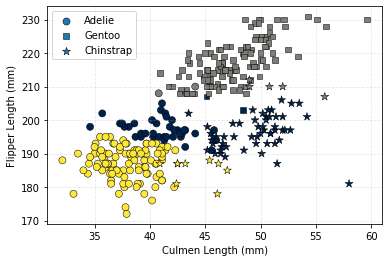

In [ ]:
# Script to recreate the figure


<ipython-input-34-b4b8f77ae862>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(adelie['culmen_length_mm'], adelie['flipper_length_mm'],c='yellow',s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)
<ipython-input-34-b4b8f77ae862>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(gentoo['culmen_length_mm'], gentoo['flipper_length_mm'], c='gray',s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)
<ipython-input-34-b4b8f77ae862>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(chinstrap['culmen_length_mm'], chinstrap['flipper_length_mm'], c='blue',s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)


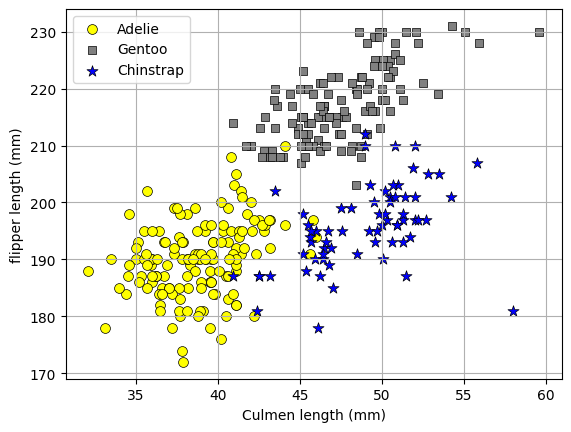

In [ ]:
#@title Skeleton code
plt.scatter(adelie['culmen_length_mm'], adelie['flipper_length_mm'],c='yellow',s=50,marker='o',label='Adelie', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)
plt.scatter(gentoo['culmen_length_mm'], gentoo['flipper_length_mm'], c='gray',s=30,marker='s',label='Gentoo', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)
plt.scatter(chinstrap['culmen_length_mm'], chinstrap['flipper_length_mm'], c='blue',s=70,marker='*',label='Chinstrap', cmap='cividis',edgecolors='k',linewidths=0.5,vmin=30,vmax=60)
plt.grid(True)
plt.ylabel('flipper length (mm)')
plt.xlabel('Culmen length (mm)')
plt.legend()
plt.show()

### Q5: Train the KMeans clustering with 2 clusters

We got this figure with our model. Can you recreate it?

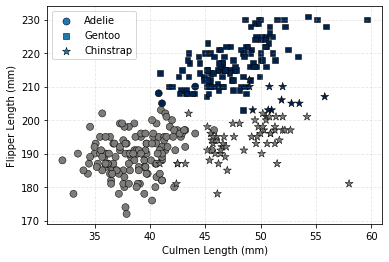

<ipython-input-67-706685c29f1b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_df['label'] = y_kmeans


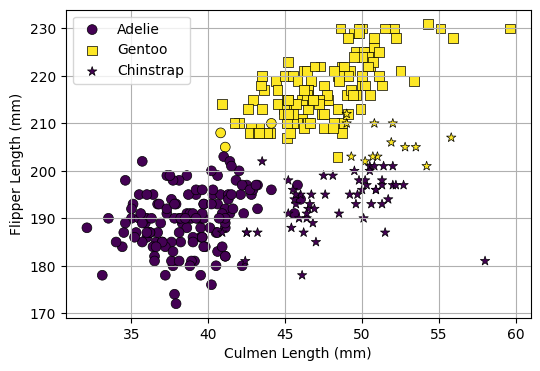

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

penguin_df['label'] = y_kmeans

plt.figure(figsize=(6,4))

plt.scatter(penguin_df[penguin_df['species']=='Adelie']['culmen_length_mm'],
            penguin_df[penguin_df['species']=='Adelie']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Adelie']['label'], s=50, marker='o',
            cmap='viridis', edgecolors='k', linewidths=0.5, label='Adelie', vmin=0, vmax=1)

plt.scatter(penguin_df[penguin_df['species']=='Gentoo']['culmen_length_mm'],
            penguin_df[penguin_df['species']=='Gentoo']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Gentoo']['label'], s=50, marker='s',
            cmap='viridis', edgecolors='k', linewidths=0.5, label='Gentoo', vmin=0, vmax=1)

plt.scatter(penguin_df[penguin_df['species']=='Chinstrap']['culmen_length_mm'],
            penguin_df[penguin_df['species']=='Chinstrap']['flipper_length_mm'],
            c=penguin_df[penguin_df['species']=='Chinstrap']['label'], s=50, marker='*',
            cmap='viridis', edgecolors='k', linewidths=0.5, label='Chinstrap', vmin=0, vmax=1)

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend()
plt.grid(True)
plt.show()


Just couldn't figure out why blue and gray in original.